In [1]:
# import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import Tk
from tkinter.filedialog import askopenfilename


# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score , confusion_matrix , classification_report
import joblib
import os


In [2]:

# Open file dialog
Tk().withdraw()  # Hide main Tkinter window
file_path = askopenfilename(filetypes=[("CSV files", "*.csv")])

# Read the selected CSV file
df = pd.read_csv(file_path)
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Education                    4653
JoiningYear                  4653
City                         4653
PaymentTier                  4653
Age                          4653
Gender                       4653
EverBenched                  4653
ExperienceInCurrentDomain    4653
LeaveOrNot                   4653
dtype: int64

In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
# split the dataset into x(features) and y(target variable)
x = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [8]:
# identify the categorical columns and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical_cols:",categorical_cols)
print("Numerical_cols:",numerical_cols)

Categorical_cols: ['Education', 'City', 'Gender', 'EverBenched']
Numerical_cols: ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']


In [9]:
#split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("X train shape: ",x_train.shape)
print("X test shape: ",x_test.shape)
print("Y train shape: ",y_train.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (3722, 8)
X test shape:  (931, 8)
Y train shape:  (3722,)
Y test shape:  (931,)


In [10]:
# Preprocess the Data

# we do the OneHotEncoding for categorical data and StandardScaling for Numerical data

preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols)
    ]
)


In [11]:
# First try with using LogisticRegression Algorithm

model_lor = Pipeline(steps=[('preprocessor',preprocessor),
                           ('classifier',LogisticRegression(random_state=42))
])

model_lor.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
y_pred_lor = model_lor.predict(x_test)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       611
           1       0.72      0.47      0.57       320

    accuracy                           0.76       931
   macro avg       0.74      0.69      0.70       931
weighted avg       0.75      0.76      0.74       931



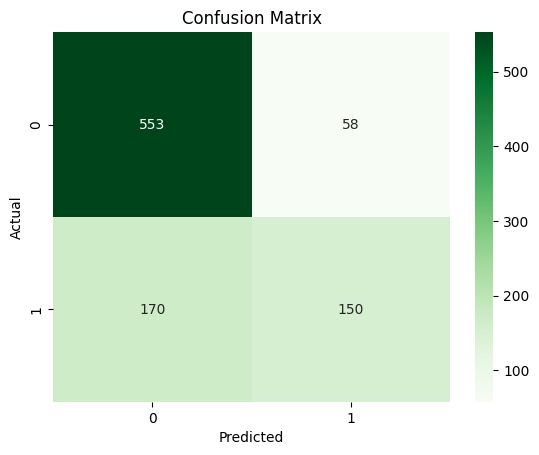

In [13]:
print(classification_report(y_test,y_pred_lor))

# confusion matrix
cm = confusion_matrix(y_test,y_pred_lor)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
#  Try with using DecisionTreeClassifier Algorithm
model_dtc = Pipeline(steps=[('preprocessor',preprocessor),
                           ('classifier',DecisionTreeClassifier(random_state=42))
])

model_dtc.fit(x_train,y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
y_pred_dtc = model_dtc.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       611
           1       0.75      0.62      0.68       320

    accuracy                           0.80       931
   macro avg       0.79      0.76      0.77       931
weighted avg       0.80      0.80      0.80       931



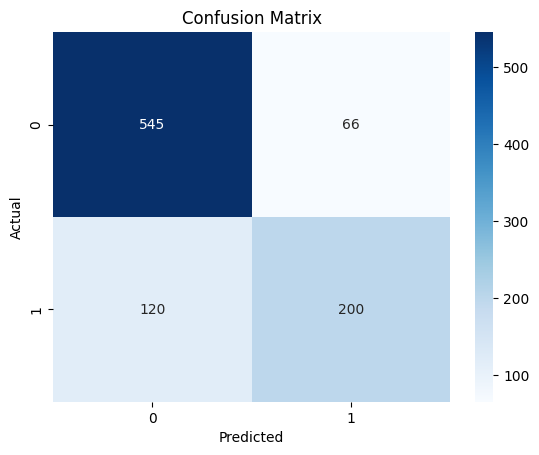

In [16]:
print(classification_report(y_test,y_pred_dtc))

# confusion matrix
cm = confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
#  Try with using RandomForestClassifier Algorithm
model_rfc = Pipeline(steps=[('preprocessor',preprocessor),
                           ('classifier',RandomForestClassifier(random_state=42, n_estimators=100))
])

model_rfc.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
y_pred_rfc = model_rfc.predict(x_test)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       611
           1       0.82      0.66      0.73       320

    accuracy                           0.83       931
   macro avg       0.83      0.79      0.81       931
weighted avg       0.83      0.83      0.83       931



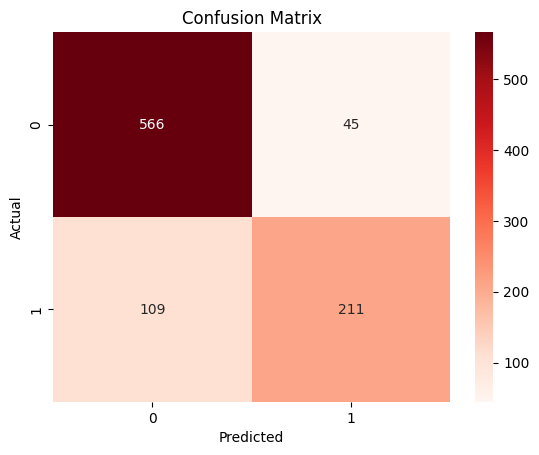

In [19]:
print(classification_report(y_test,y_pred_rfc))


cm = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
# compare the models
models = {
    'Logistic Regression': model_lor,
    'Decision Tree': model_dtc,
    'Random Forest': model_rfc
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


Logistic Regression:
Accuracy: 0.7551
Precision: 0.7212
Recall: 0.4688
F1 Score: 0.5682

Decision Tree:
Accuracy: 0.8002
Precision: 0.7519
Recall: 0.6250
F1 Score: 0.6826

Random Forest:
Accuracy: 0.8346
Precision: 0.8242
Recall: 0.6594
F1 Score: 0.7326



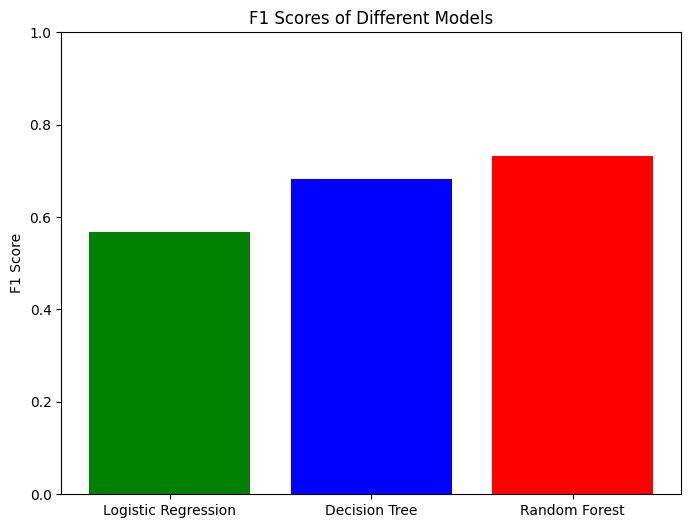

In [21]:
# Visualize the f1 values

f1_scores = {name: f1_score(y_test, model.predict(x_test)) for name, model in models.items()}

plt.figure(figsize=(8, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['green', 'blue', 'red'])
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.ylim(0, 1)
plt.show()

In [23]:
# select the best model and save it in .joblib format
best_model = model_rfc

#save the best model

filename = 'employee_leave_predictor.joblib'

joblib.dump(best_model, filename)

print(f"\n Best model (Random Forest CLassifier pipeline) has been saved as '{filename}'.")


 Best model (Random Forest CLassifier pipeline) has been saved as 'employee_leave_predictor.joblib'.


In [24]:
#inference function to make the single prediction from the best model

def predict_leave_or_not(employee_data, model, preprocessor):
    """
    Makes a single prediction for employee attrition.

    Args:
        employee_data (dict): A dictionary containing the employee's features.
                              Keys should match the original column names.
        model: The trained model pipeline.
        preprocessor: The fitted preprocessor.

    Returns:
        int: The predicted class (0 for no leave, 1 for leave).
    """
    # Convert the input data to a DataFrame
    data_df = pd.DataFrame([employee_data])

    # Make prediction
    prediction = model.predict(data_df)

    return prediction[0]



In [27]:
# Example usage (assuming 'best_model' and 'preprocessor' are available from previous steps)
# replace this with actual new employee data
new_employee_data = {
    'Education': 'Bachelors',
    'JoiningYear': 2018,
    'City': 'Bangalore',
    'PaymentTier': 3,
    'Age': 25,
    'Gender': 'Male',
    'EverBenched': 'No',
    'ExperienceInCurrentDomain': 2
}

predicted_leave = predict_leave_or_not(new_employee_data, best_model, preprocessor)
print(f"Predicted Leave or Not: {predicted_leave}")

if predicted_leave==1 :
    print ("Leave")
else :
    print ("Not Leave")

Predicted Leave or Not: 1
Leave
